# Case Study: Neuro

## Import Packages

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
srcdir='/Users/pengzhizhang/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding

## Velocity Estimation for Sample Genes

In [ ]:
%autoreload 2

cell_type_u_s_path="/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/DentateGyrus.csv"
#cell_type_u_s_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/DentateGyrus.csv'
#cell_type_u_s_path='/Users/chen.weiqing/code/celldancer/DentateGyrus.csv'
cell_type_u_s=pd.read_csv(cell_type_u_s_path)
cell_type_u_s

In [ ]:
%autoreload 2

max_epoches=200
check_val_every_n_epoch=10
patience=3
permutation_ratio=0.1
speed_up=True
norm_u_s=False
norm_cell_distribution=False
n_jobs=8
save_path=None

gene_list=['Ntrk2','Dctn3','Nav1','Psd3',\
           'Gnao1','Ncald','Klf7','Ank2',\
           'Evl','Cdh13','Ppfia2','Astn1',\
           'Nrxn1','Dcx','Prkcg','Pygb','Scn2a1',\
            'Tbc1d16','Slc1a3','Syt11']


# Velocity Estimation
loss_df, cellDancer_df=velocity_estimation.velocity(cell_type_u_s,\
                                         gene_list=gene_list,\
                                         max_epoches=max_epoches,\
                                         check_val_every_n_epoch=check_val_every_n_epoch,\
                                         patience=patience,\
                                         permutation_ratio=permutation_ratio,\
                                         speed_up=speed_up,\
                                         norm_u_s=norm_u_s,\
                                         norm_cell_distribution=norm_cell_distribution,\
                                         n_jobs=n_jobs,\
                                         save_path=save_path)
cellDancer_df

## Sample Genes' Velocity Plot

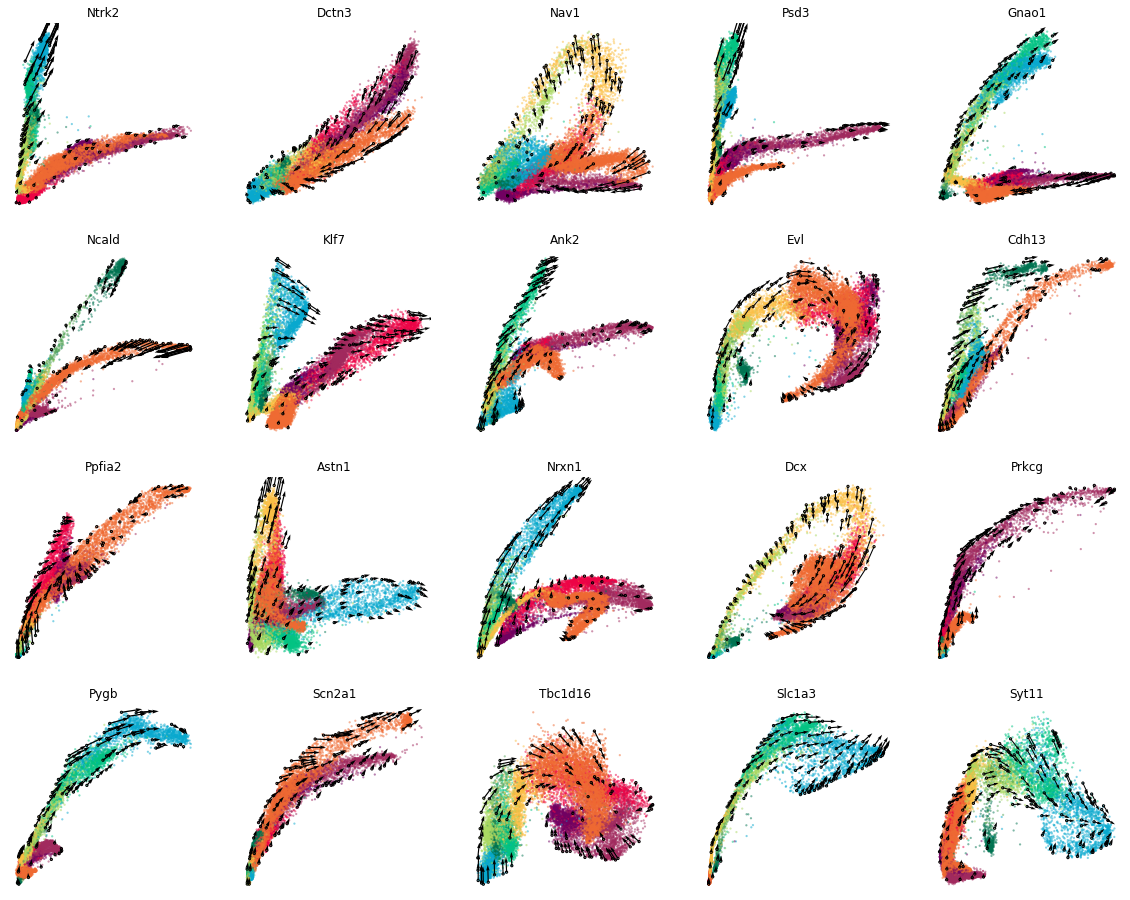

In [73]:
%autoreload 2

gene_list=["Ank","Abcc8","Sulf2","Tcp11","Nfib","Ppp3ca",
        "Rbfox3","Cdk1","Gng12","Map1b","Cpe",
        "Gnao1","Pcsk2","Tmem163","Pak3","Wfdc15b",
        "Nnat","Anxa4","Actn4","Btbd17","Dcdc2a",
        "Adk","Smoc1","Mapre3","Pim2","Tspan7",
        "Top2a","Rap1b"]
gene_list=['Ntrk2','Dctn3','Nav1','Psd3',\
           'Gnao1','Ncald','Klf7','Ank2',\
           'Evl','Cdh13','Ppfia2','Astn1',\
           'Nrxn1','Dcx','Prkcg','Pygb','Scn2a1',\
            'Tbc1d16','Slc1a3','Syt11']
ncols=5

height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

## Load velocity estimation result of 2159 genes

In [4]:
cellDancer_df_file='/Users/pengzhizhang/pseudotime/data/neuro/velocity_result/celldancer_estimation.csv'
cellDancer_df=pd.read_csv(cellDancer_df_file)
cellDancer_df

,cellIndex,gene_name,splice,unsplice,splice_predict,unsplice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Stom,0.006305,0.000000,0.005999,0.000520,0.001040,0.427941,0.096933,0.070205,10X83_2:AAACGGGGTCTCTTTAx,ImmGranule2,18.931086,-1.862429
1,1,Stom,0.006305,0.000000,0.005999,0.000520,0.001040,0.427941,0.096933,0.070205,10X83_2:AACCATGGTTCAACCAx,ImmGranule2,18.419891,-1.282895
2,2,Stom,0.008353,0.000000,0.007948,0.000517,0.001034,0.427932,0.096955,0.070205,10X83_2:AACACGTTCTGAAAGAx,CA2-3-4,2.369887,16.868419
3,3,Stom,0.000000,0.000000,0.000000,0.000528,0.001056,0.427962,0.096864,0.070205,10X83_2:AAAGATGCATTGAGCTx,CA,-5.351040,10.676485
4,4,Stom,0.000000,0.000000,0.000000,0.000528,0.001056,0.427962,0.096864,0.070205,10X83_2:AACCATGTCTACTTACx,CA1-Sub,-6.189126,11.754900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39164255,18135,Prmt8,0.262922,0.131071,0.267516,0.142995,0.100474,0.584625,0.256505,0.112949,10X84_3:TTTCCTCCACCATCCTx,ImmGranule1,10.812611,-2.487668
39164256,18136,Prmt8,0.531809,0.198949,0.519074,0.199198,0.114583,0.573442,0.262416,0.112949,10X84_3:TTTGTCACATGAAGTAx,CA2-3-4,8.246204,23.482788
39164257,18137,Prmt8,0.212177,0.173362,0.235597,0.179191,0.112267,0.580340,0.253414,0.112949,10X84_3:TTTCCTCCACGGTAAGx,nIPC,-3.441272,-4.917364
39164258,18138,Prmt8,0.338159,0.216978,0.357323,0.213939,0.118856,0.575789,0.256112,0.112949,10X84_3:TTTGTCAAGCGTCAAGx,ImmGranule2,16.394199,-6.143549


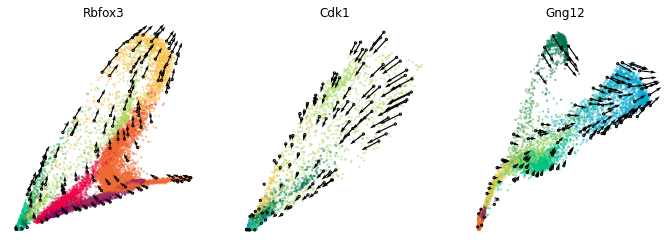

In [5]:
gene_list=["Ank","Abcc8","Sulf2","Tcp11","Nfib","Ppp3ca",
        "Rbfox3","Cdk1","Gng12","Map1b","Cpe",
        "Gnao1","Pcsk2","Tmem163","Pak3","Wfdc15b",
        "Nnat","Anxa4","Actn4","Btbd17","Dcdc2a",
        "Adk","Smoc1","Mapre3","Pim2","Tspan7",
        "Top2a","Rap1b"][6:9]

ncols=5

height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))
# fig = plt.figure(figsize=(20,20))
for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis("off")

plt.show()

## Compute Cell Velocity

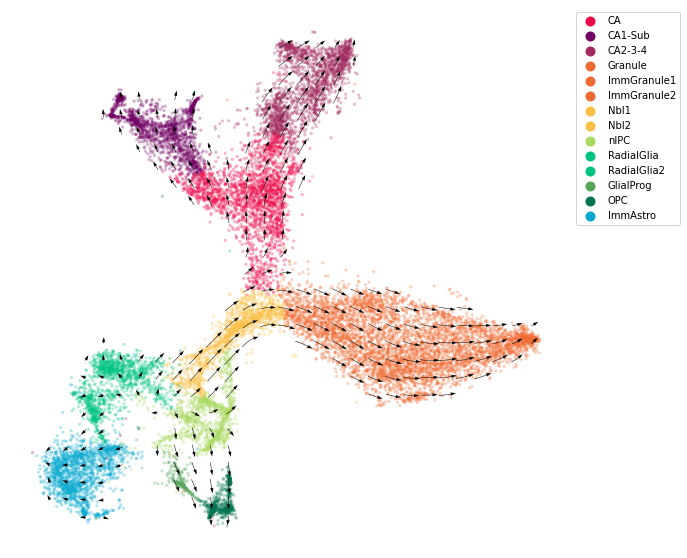

In [6]:
%autoreload 2

# Set Parameters
projection_neighbor_choice='embedding'
expression_scale=None
projection_neighbor_size=200
speed_up=(60,60)

# Compute cell velocity
cellDancer_df=compute(cellDancer_df=cellDancer_df,
              projection_neighbor_choice=projection_neighbor_choice,
              expression_scale=expression_scale,
              projection_neighbor_size=projection_neighbor_size,
              speed_up=speed_up)

# Plot cell velocity
# Set Parameters
min_mass=2
arrow_grid=(30,30)
alpha_inside=0.3


fig, ax = plt.subplots(figsize=(10,10))
im = cdplt.cell.scatter_cell(ax,cellDancer_df, colors=colormap.colormap_neuro, alpha=alpha_inside, s=10,
             velocity=True, legend='on',min_mass=min_mass,arrow_grid=arrow_grid)
ax.axis('off')
plt.show()

## Estimate Pseudotime

Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|██████████| 8880/8880 [00:08<00:00, 989.42it/s] 


There are 3 clusters.
[0 1 2]
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


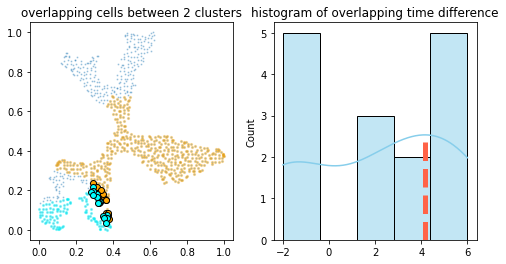

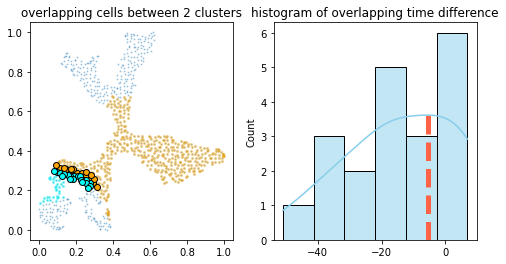

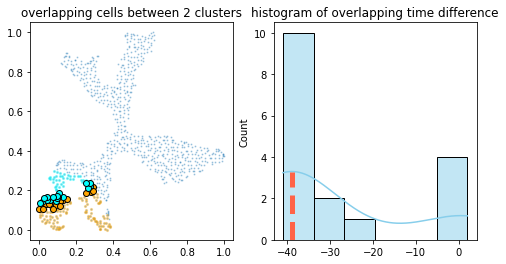

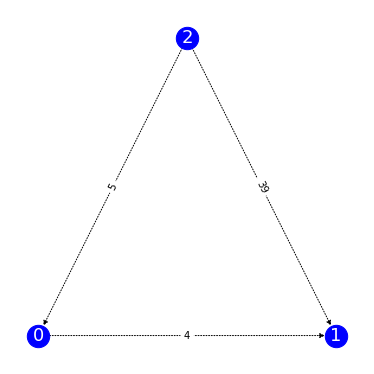

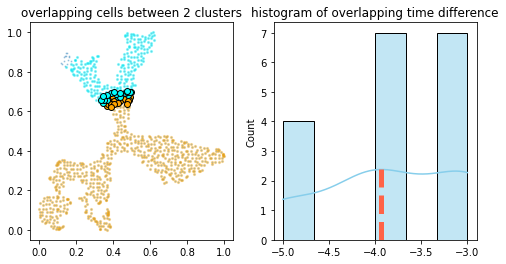

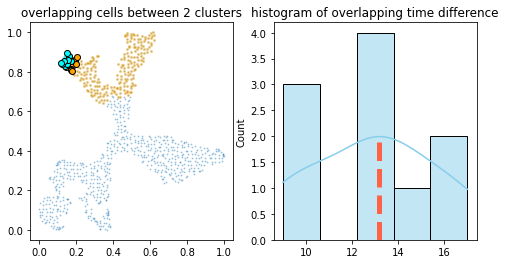

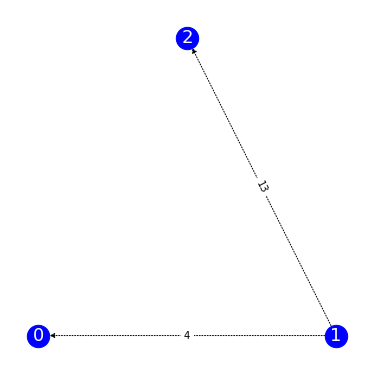

--- 60.00114417076111 seconds ---


In [23]:
%autoreload 2

dt = 0.05
t_total = {0.05: 1000}
n_repeats = 10

speed_up=(60,60)
grid = (30, 30)
load_cellDancer = pseudo_time(
    cellDancer_df=cellDancer_df, 
    grid=grid, 
    dt=dt, 
    t_total=t_total[dt], 
    n_repeats=n_repeats, 
    speed_up=speed_up,
    n_paths = 3,
    psrng_seeds_diffusion=[i for i in range(n_repeats)],
    activate_umap_paths_divider=False,
    n_jobs=12)

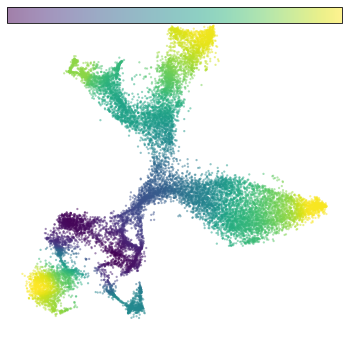

In [22]:
## Plot Pseudotime
fig, ax = plt.subplots(figsize=(6,6))
im=cdplt.cell.scatter_cell(ax,cellDancer_df, colors='pseudotime', alpha=0.5, 
             velocity=False)
ax.axis('off')
plt.show()

## Gene Pseudotime

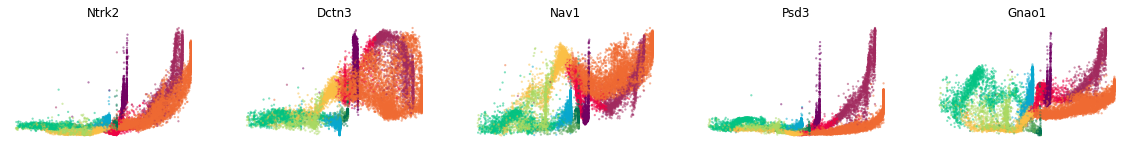

In [24]:

ncols=5
gene_list=['Ntrk2','Dctn3','Nav1','Psd3',\
           'Gnao1','Ncald','Klf7','Ank2',\
           'Evl','Cdh13','Ppfia2','Astn1',\
           'Nrxn1','Dcx','Prkcg','Pygb','Scn2a1',\
            'Tbc1d16','Slc1a3','Syt11']


fig = plt.figure(figsize=(20,10))
for i in range(len(gene_list[0:5])):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='splice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

## Gene Parameter in Cell Level

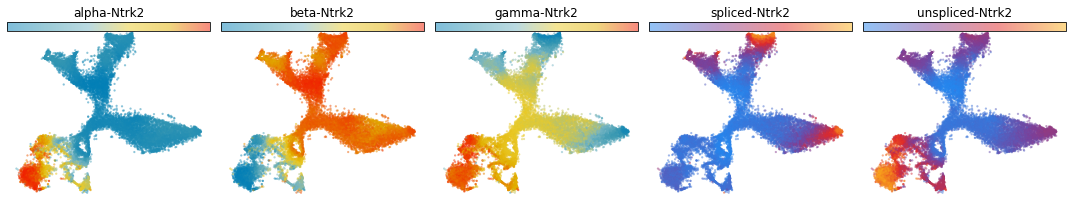

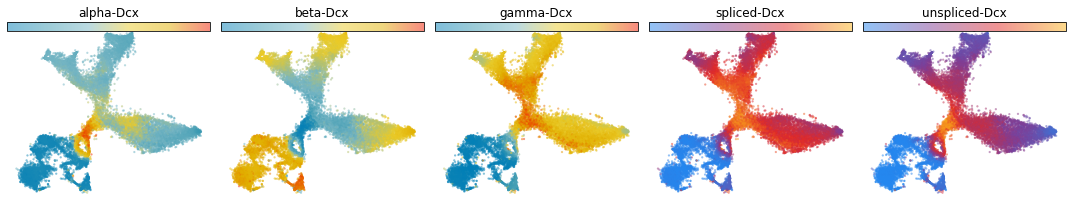

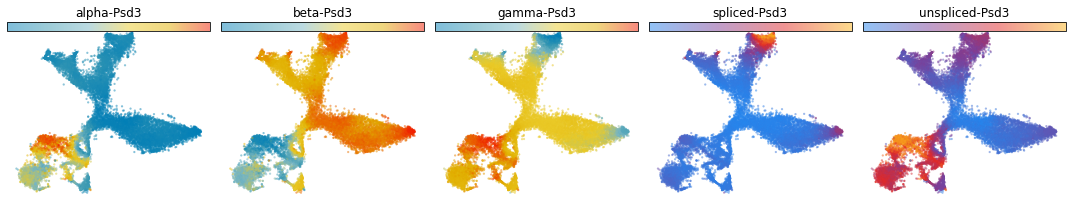

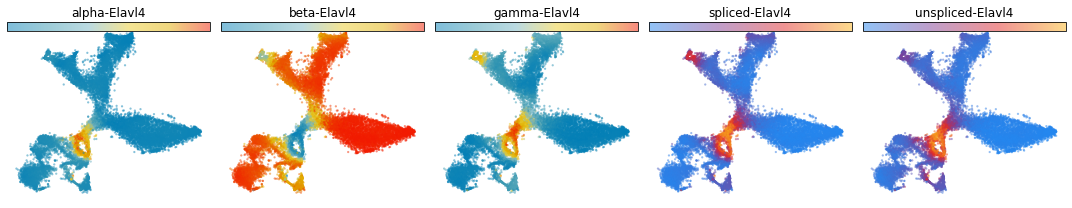

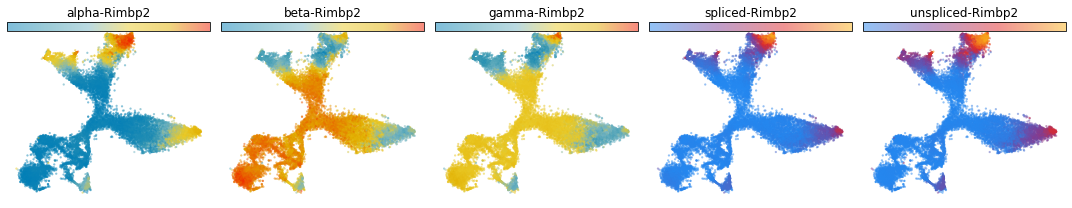

In [25]:
gene_samples=['Ntrk2','Dcx','Psd3','Elavl4','Rimbp2']
for gene in gene_samples:
    fig, ax = plt.subplots(ncols=5, figsize=(15,3))
    cdplt.cell.scatter_cell(ax[0],cellDancer_df, colors='alpha', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[1],cellDancer_df, colors='beta', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[2],cellDancer_df, colors='gamma', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[3],cellDancer_df, colors='splice', 
                 gene=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[4],cellDancer_df, colors='unsplice', 
                 gene=gene, velocity=False)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')
    ax[3].axis('off')
    ax[4].axis('off')
    ax[0].set_title('alpha-'+gene)
    ax[1].set_title('beta-'+gene)
    ax[2].set_title('gamma-'+gene)
    ax[3].set_title('spliced-'+gene)
    ax[4].set_title('unspliced-'+gene)
    plt.tight_layout()
    plt.show()

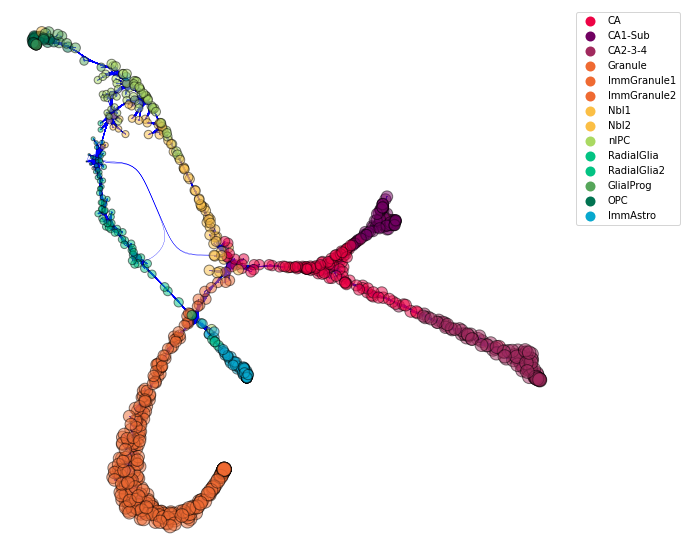

In [26]:
%autoreload 2

from celldancer.plotting.graph import graph
fig, ax= plt.subplots(figsize=(10,10)) 
graph(ax,
cellDancer_df,  
node_layout='forcedirected', 
use_edge_bundling=True, 
node_colors=colormap.colormap_neuro, 
edge_length=3, 
node_sizes='pseudotime', 
colorbar='on', 
legend='on')

In [27]:
cellDancer_df

,cellIndex,gene_name,splice,unsplice,splice_predict,unsplice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2,index,velocity1,velocity2,pseudotime
0,0,Stom,0.006305,0.000000,0.005999,0.000520,0.001040,0.427941,0.096933,0.070205,10X83_2:AAACGGGGTCTCTTTAx,ImmGranule2,18.931086,-1.862429,0,NaN,NaN,0.935478
1,1,Stom,0.006305,0.000000,0.005999,0.000520,0.001040,0.427941,0.096933,0.070205,10X83_2:AACCATGGTTCAACCAx,ImmGranule2,18.419891,-1.282895,1,NaN,NaN,0.921841
2,2,Stom,0.008353,0.000000,0.007948,0.000517,0.001034,0.427932,0.096955,0.070205,10X83_2:AACACGTTCTGAAAGAx,CA2-3-4,2.369887,16.868419,2,NaN,NaN,0.784353
3,3,Stom,0.000000,0.000000,0.000000,0.000528,0.001056,0.427962,0.096864,0.070205,10X83_2:AAAGATGCATTGAGCTx,CA,-5.351040,10.676485,3,NaN,NaN,0.587125
4,4,Stom,0.000000,0.000000,0.000000,0.000528,0.001056,0.427962,0.096864,0.070205,10X83_2:AACCATGTCTACTTACx,CA1-Sub,-6.189126,11.754900,4,NaN,NaN,0.596204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39127975,18135,Prmt8,0.262922,0.131071,0.267516,0.142995,0.100474,0.584625,0.256505,0.112949,10X84_3:TTTCCTCCACCATCCTx,ImmGranule1,10.812611,-2.487668,18135,NaN,NaN,0.740977
39127976,18136,Prmt8,0.531809,0.198949,0.519074,0.199198,0.114583,0.573442,0.262416,0.112949,10X84_3:TTTGTCACATGAAGTAx,CA2-3-4,8.246204,23.482788,18136,NaN,NaN,0.951580
39127977,18137,Prmt8,0.212177,0.173362,0.235597,0.179191,0.112267,0.580340,0.253414,0.112949,10X84_3:TTTCCTCCACGGTAAGx,nIPC,-3.441272,-4.917364,18137,NaN,NaN,0.424718
39127978,18138,Prmt8,0.338159,0.216978,0.357323,0.213939,0.118856,0.575789,0.256112,0.112949,10X84_3:TTTGTCAAGCGTCAAGx,ImmGranule2,16.394199,-6.143549,18138,NaN,NaN,0.866061


In [31]:
from celldancer.utilities import extract_from_df
def create_nodes_edges(data, radius):
    def create_KNN_based_graph():
        from sklearn.neighbors import NearestNeighbors
        neigh = NearestNeighbors(radius = radius)
        neigh.fit(embedding_ds)
        nn_graph = neigh.radius_neighbors_graph(embedding_ds, mode='connectivity')
        nn_array = nn_graph.toarray()

        # nn_array is effectively the edge list
        # Keep track of cells of 0 timeshift.
        node_list = [(i, {'pseudotime': pseudotime_ds[i,0], 'clusters':clusters_ds[i]})
                     for i in range(len(embedding_ds))]

        dtime = pseudotime_ds[:,0] - pseudotime_ds
        INF = 1./np.min(np.abs(dtime[dtime != 0]))

        # upper triangle of the knn array (i<j and nn_array[i,j] = 1)
        edge_filter = np.triu(nn_array, k=1)
        (i,j) = np.where(edge_filter != 0)

        # for forcedirected layouts,
        # edge length is positively correlated with weight.
        # hence 1/dtime here as the weight
        # Created for directed graph
        edge_list = list()
        for a,b,w in zip(i,j, dtime[i,j]):
            if w>0:
                edge_list.append((a, b, 1/w))
            elif w<0:
                edge_list.append((a, b, -1/w))
            else:
                edge_list.append((a, b, INF))

        G = nx.Graph()
        G.add_nodes_from(node_list)
        G.add_weighted_edges_from(edge_list)
        return G

    embedding = extract_from_df(data, ['embedding1', 'embedding2'])
    n_cells = embedding.shape[0]
    sample_cells = data['velocity1'][:n_cells].dropna().index
    clusters = extract_from_df(data, ['clusters'])
    pseudotime = extract_from_df(data, ['pseudotime'])

    embedding_ds = embedding[sample_cells]
    pseudotime_ds = pseudotime[sample_cells]
    clusters_ds = clusters[sample_cells]

    G = create_KNN_based_graph()

    index = np.array(range(len(embedding_ds)), dtype=int)[:,None]
    nodes = pd.DataFrame(np.hstack((embedding_ds, index, pseudotime_ds, clusters_ds)),
                         columns=['x','y','index','pseudotime','clusters'])

    edges = pd.DataFrame([(i[0], i[1], G.edges[i]['weight']) for i in G.edges],
                         columns=['source', 'target', 'weight'])

## UMAP using alpha, beta, and gamma

In [36]:
cellDancer_df=embedding(cellDancer_df,'alpha')
cellDancer_df=embedding(cellDancer_df,'beta')
cellDancer_df=embedding(cellDancer_df,'gamma')
cellDancer_df=embedding(cellDancer_df,'alpha_beta_gamma')

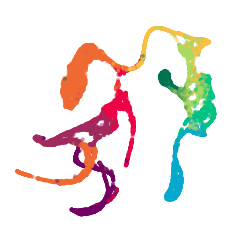

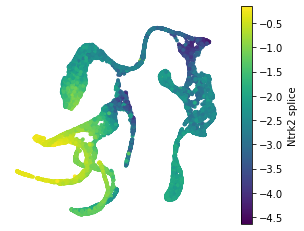

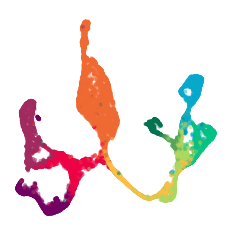

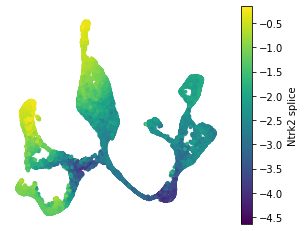

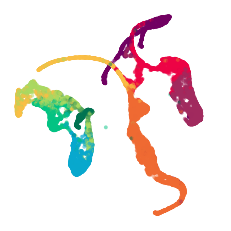

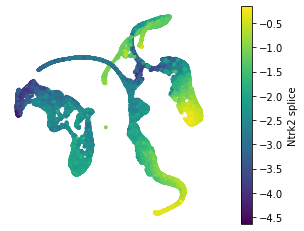

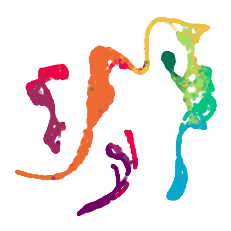

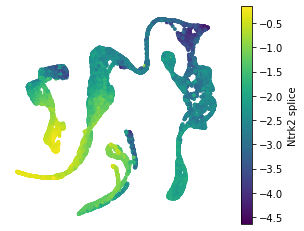

In [35]:
cdplt.cell.plot_kinetic_para('alpha',cellDancer_df,color_map=cdplt.colormap.colormap_neuro, save_path=None,title=None)
cdplt.cell.plot_kinetic_para('alpha',cellDancer_df,gene='Ntrk2',color_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('beta',cellDancer_df,color_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('beta',cellDancer_df,gene='Ntrk2',color_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('gamma',cellDancer_df,color_map=cdplt.colormap.colormap_neuro,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('gamma',cellDancer_df,gene='Ntrk2',color_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('alpha_beta_gamma',cellDancer_df,color_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)
cdplt.cell.plot_kinetic_para('alpha_beta_gamma',cellDancer_df,gene='Ntrk2',color_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)